In [554]:
import numpy as np
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
path='./data/'
mask=pd.read_csv(path+'mask.csv',header=None).T
mask=pd.melt(mask,ignore_index=False).reset_index().set_index(['index','variable'])

## Load Data

In [555]:
f_uv=[];f_us=[];f_vs=[]
for t in range(1,101):
    f_u=pd.read_csv(path+str(t)+'u'+'.csv',header=None)
    f_v=pd.read_csv(path+str(t)+'v'+'.csv',header=None)
    f_uv.append((f_u**2+f_v**2).map(np.sqrt))
    f_us.append(f_u)
    f_vs.append(f_v)

In [556]:
df=f_uv[0]
df=pd.melt(df,ignore_index=False)
loc_index=df.reset_index().set_index(['variable','index']).index

In [558]:
uvs=pd.DataFrame()
us=pd.DataFrame()
vs=pd.DataFrame()
for t in range(len(f_uv)):
    uvs[str(t)]=pd.melt(f_uv[t])['value']
    us[str(t)]=pd.melt(f_us[t])['value']
    vs[str(t)]=pd.melt(f_vs[t])['value']
uvs.index=loc_index
us.index=loc_index
vs.index=loc_index
us.to_pickle('us.pkl')
vs.to_pickle('vs.pkl')

In [561]:
us=pd.read_pickle('us.pkl')
vs=pd.read_pickle('vs.pkl')

In [563]:
vs

0         1         2         3         4         5  \
variable index                                                               
0        0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
         1      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
         2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
         3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
         4      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...                  ...       ...       ...       ...       ...       ...   
554      499    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
         500    0.018891  0.027071  0.033702  0.034631  0.034942  0.035076   
         501    0.031483  0.045114  0.056164  0.057713  0.058231  0.058455   
         502    0.012591  0.018043  0.022463  0.023082  0.023289  0.023379   
         503    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                       6         7         8         9  ...        90  \
variable index                                          ...             
0        0      0.000000  0.000000  0.000000  0.000000  ...  0.000000   
         1      0.000000  0.000000  0.000000  0.000000  ...  0.000000   
         2      0.000000  0.000000  0.000000  0.000000  ...  0.000000   
         3      0.000000  0.000000  0.000000  0.000000  ...  0.000000   
         4      0.000000  0.000000  0.000000  0.000000  ...  0.000000   
...                  ...       ...       ...       ...  ...       ...   
554      499    0.000000  0.000000  0.000000  0.000000  ...  0.000000   
         500    0.028644  0.021698  0.023178  0.031465  ...  0.026976   
         501    0.047735  0.036160  0.038626  0.052436  ...  0.044956   
         502    0.019092  0.014462  0.015448  0.020972  ...  0.017980   
         503    0.000000  0.000000  0.000000  0.000000  ...  0.000000   

                      91        92        93        94        95        96  \
variable index                                                               
0        0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
         1      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
         2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
         3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
         4      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...                  ...       ...       ...       ...       ...       ...   
554      499    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
         500    0.028976  0.029902  0.027019  0.022797  0.023789  0.029248   
         501    0.048289  0.049832  0.045027  0.037992  0.039645  0.048742   
         502    0.019313  0.019930  0.018008  0.015195  0.015856  0.019494   
         503    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                      97        98        99  
variable index                                
0        0      0.000000  0.000000  0.000000  
         1      0.000000  0.000000  0.000000  
         2      0.000000  0.000000  0.000000  
         3      0.000000  0.000000  0.000000  
         4      0.000000  0.000000  0.000000  
...                  ...       ...       ...  
554      499    0.000000  0.000000  0.000000  
         500    0.033281  0.030392  0.031475  
         501    0.055463  0.050648  0.052453  
         502    0.022182  0.020256  0.020978  
         503    0.000000  0.000000  0.000000  

[279720 rows x 100 columns]

In [7]:
uvs_vars=uvs.var(axis=1)
uvs_vars[uvs_vars>0].sort_values()

variable  index
170       121      1.242185e-13
          127      1.412713e-13
          128      1.412713e-13
          123      2.949016e-13
47        142      7.759326e-13
                       ...     
337       179      2.734541e+00
346       182      2.780220e+00
          181      2.793458e+00
347       182      2.834186e+00
          181      2.888829e+00
Length: 234579, dtype: float64

In [8]:
vs.values.mean()

np.float64(-0.03548388738810678)

## Remote correlations

In [ ]:
choices=random.sample(list(uvs_vars[uvs_vars>0].index),500)
corrs=us.loc[choices].T.corr(method='pearson')/2+vs.loc[choices].T.corr(method='pearson')/2
plt.matshow(corrs)
plt.colorbar()
plt.show()

In [ ]:
dis=[]
for i in range(len(choices)):
    tdist=[]
    for j in range(len(choices)):
        tdist.append(np.linalg.norm(np.array(corrs.index[i])-np.array(corrs.index[j])))
    dis.append(tdist)
dis=pd.DataFrame(dis,index=corrs.index,columns=corrs.columns)
plt.matshow(dis)
plt.colorbar()
plt.show()

In [ ]:
true_corrs=corrs[((corrs>0.6)|(corrs<-0.6))&(dis>np.median(dis.values))]#
plt.matshow(true_corrs,cmap=matplotlib.cm.Spectral_r)
plt.colorbar()
plt.savefig('true_corrs.png',dpi=400)
plt.show()

In [ ]:
relations=[]
rs=[]
p_dis=[]
for i in range(len(choices)):
    for j in true_corrs.iloc[i,i:len(choices)].dropna().index:
        relations.append((choices[i],j))
        rs.append(true_corrs.loc[choices[i],j])
        p_dis.append(dis.loc[choices[i],j])

In [ ]:
len(relations)

In [ ]:
rs[100]

In [ ]:
for i in range(len(relations))[100:101]:
    #colors='red' if rs[i]>0 else 'blue'
    plt.scatter(relations[i][0][0],relations[i][0][1],color='blue',zorder=0)
    plt.scatter(relations[i][1][0],relations[i][1][1],color='red',marker='x',zorder=1)
    plt.plot([relations[i][0][0],relations[i][1][0]],[relations[i][0][1],relations[i][1][1]],color='black',zorder=2,alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'All relationship:{len(relations)} pairs')

x_mask=[i[0] for i in mask[mask['value']==0].index]
y_mask=[i[1] for i in mask[mask['value']==0].index]

plt.scatter(x_mask,y_mask,marker='+',s=5,color='grey',alpha=0.5)

plt.gca().invert_yaxis()

plt.savefig('All_relations_2.png',dpi=400)
plt.show()
plt.close()

In [ ]:
f_uv[0].shape[1],f_uv[0].shape[0]

## Simulation Ocean flow

In [625]:
ss=1600
x_inital=np.random.multivariate_normal([100,350],[[ss,0],[0,ss]],size=10).T[0]#np.linspace(50,500,7)
y_inital=np.random.multivariate_normal([100,350],[[ss,0],[0,ss]],size=10).T[1]#np.linspace(50,450,7)
#x_inital,y_inital=np.meshgrid(x_inital,y_inital)

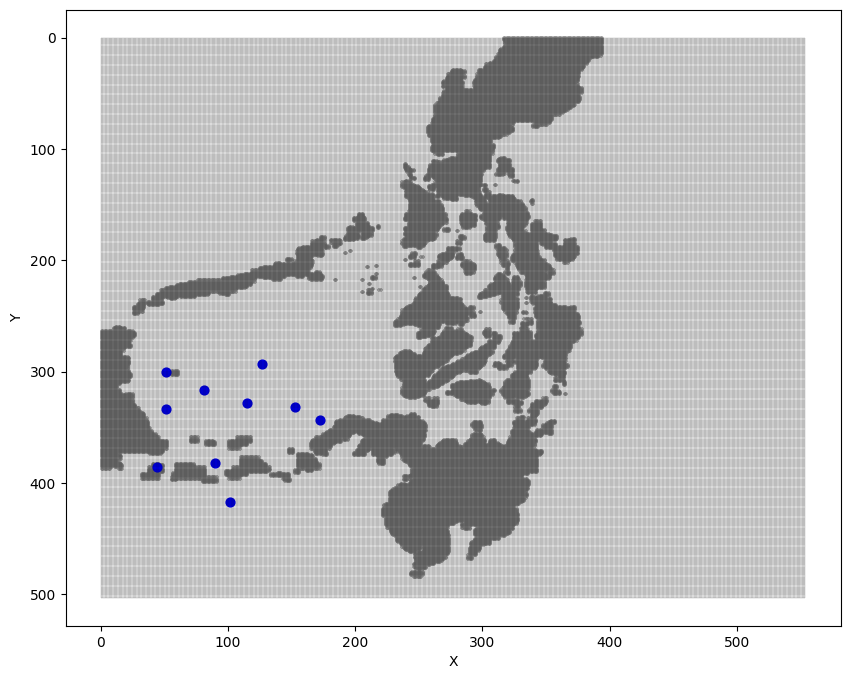

In [626]:
plt.figure(figsize=(10,8))
plt.scatter(x_mask,y_mask,marker='+',s=5,color='grey',alpha=0.5)##plot_mask
plt.scatter(x_inital,y_inital,marker='o',s=40,color='blue')
for i in range(504):
    plt.hlines(y=i,xmin=0,xmax=554,color='black',linewidth=0.1)
for j in range(555):
    plt.vlines(x=j,ymin=0,ymax=503,color='black',linewidth=0.1)
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().invert_yaxis()
#plt.savefig('Inintial.png',dpi=400)

In [677]:
def get_v(x,y,t):
    tt=int(t)
    xx=int(x)
    yy=int(y)
    if t>=16 or tt<0 or xx>554 or yy>503 or xx<0 or yy<0:
        print('Overtimed!')
        return  np.nan,np.nan
    else:
        return us.loc[(xx,yy),str(tt)],vs.loc[(xx,yy),str(tt)] ##km/h

In [678]:
def boundary_t(x,y,t):
    vx,vy=get_v(x,y,t)
    x_b=int(x) if np.sign(vx)<=0 else int(x)+1
    y_b=int(y) if np.sign(vy)<=0 else int(y)+1
    #print(vx,vy,x_b,y_b)
    if np.abs(vx)<1e-64 and np.abs(vy)<1e-64:
        return np.nan
    elif np.abs(vx)<1e-64:
        return (y_b-y)/vy
    elif np.abs(vy)<1e-64:
        return (x_b-x)/vx
    elif np.isnan(vx) or np.isnan(vy):
        return np.nan
    else:
        #print(x_b-x,y_b-y)
        return np.min([(x_b-x)*1.0/vx,(y_b-y)*1.0/vy])

In [679]:
def update_loc(x,y,t0,dt):
    xx=x;yy=y;tt=t0
    vx,vy=get_v(xx,yy,tt)
    bt=boundary_t(xx,yy,tt)
    output=[]
    if np.isnan([vx,vy,bt]).any():
        print(f'Updated error!tt:{tt},vx:{vx},vy:{vy},bt:{bt}')
        return np.nan,np.nan
    while True:#tt+bt<=t0+dt
        if np.abs(bt)<1e-6:
            bt=1e-6
        if bt<int(tt+1)-tt:
            xx+=vx*bt*(1+1e-6)
            yy+=vy*bt*(1+1e-6)
            tt+=bt
            print(tt,': ',xx,yy)
            output.append((tt,xx,yy))
        else:
            xx+=vx*(int(tt+1)-tt)*(1+1e-6)
            yy+=vy*(int(tt+1)-tt)*(1+1e-6)
            tt=int(tt+1)
            print(tt,': ',xx,yy)
            output.append((tt,xx,yy))
        vx,vy=get_v(xx,yy,tt)
        bt=boundary_t(xx,yy,tt)
        if np.isnan([vx,vy,bt]).any():
            print(f'Updated error!tt:{tt},vx:{vx},vy:{vy},bt:{bt}')
            break
    return output

In [680]:
output=[]
for x,y in zip(x_inital.flatten(),y_inital.flatten()):
    output.append((x,y,update_loc(x,y,0,99)))

1 :  152.26166766249597 331.45304947284933
2 :  152.16663556746397 331.15728917708935
2.6032414554320527 :  152.13480610348012 330.99999984271085
3 :  152.10118911514047 330.8962711850904
4 :  152.10534231929367 330.69608098490045
5 :  152.18499639894767 330.5077707965904
6 :  152.23875045270168 330.25360054242043
6.70430900219521 :  152.17640847903047 329.99999974639945
7 :  152.14180668386558 329.89066197680353
7.534736166015241 :  151.99999985819332 329.70111385848816
8 :  151.8765373237447 329.5405930226044
9 :  151.61445706166472 329.1602426422544
9.473852329462662 :  151.48833166100638 328.9999998397574
10 :  151.32849310033544 328.81330141364566
11 :  151.06782283966544 328.52114112148564
11.358907973040372 :  150.99999993217716 328.43638491889607
12 :  150.87289048888255 328.28772835102825
13 :  150.76160037759254 328.10375816705823
13.579946157611264 :  150.6979802204825 327.99999989624183
14 :  150.63831571304516 327.9228275271459
15 :  150.38531546004515 327.6086272129459
16

In [681]:
final_loc=pd.DataFrame(output)
final_loc['Final_loc']=final_loc[2].apply(lambda x:x[-1])

In [682]:
tmp=final_loc[final_loc['Final_loc'].isna()]
tmp['Final_loc']=[(100,x,y) for x,y in zip(tmp[0],tmp[1])]

/var/folders/3f/xzd8djzd4pj4zcyvrnnpb03r0000gn/T/ipykernel_8078/3428600548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Final_loc']=[(100,x,y) for x,y in zip(tmp[0],tmp[1])]


In [683]:
final_loc.update(tmp['Final_loc'])

In [684]:
final_loc['X']=final_loc['Final_loc'].apply(lambda x:x[1])
final_loc['Y']=final_loc['Final_loc'].apply(lambda x:x[2])

In [685]:
final_loc

0           1                                                  2  \
0  152.363868  331.769340  [(1, 152.26166766249597, 331.45304947284933), ...   
1  126.887718  293.418373                                         (nan, nan)   
2   89.404392  381.912610  [(0.9989308831772293, 89.36502413904662, 382.0...   
3   43.887587  385.514223  [(1, 43.554526674570695, 385.30968312144546), ...   
4   81.219250  316.573918  [(1, 81.54316054294382, 316.35461819134315), (...   
5  172.568311  343.141100  [(0.8179706352782465, 172.71447437271866, 342....   
6   51.505070  333.273683  [(1, 51.88101083020614, 333.1313829230353), (1...   
7  114.799998  328.180226  [(1, 114.78953437969733, 328.67814642286925), ...   
8  101.485428  416.763440  [(1, 101.30429741120412, 416.3918492307131), (...   
9   50.993933  300.270228  [(0.18243560235285924, 51.00000000606653, 300....   

                                       Final_loc           X           Y  
0    (16, 150.04573512046514, 327.2729368772559)  150.045735  327.272937  
1  (100, 126.88771787655305, 293.41837322618693)  126.887718  293.418373  
2     (16, 89.03935203084522, 383.8554741026432)   89.039352  383.855474  
3   (16, 39.020917045558306, 383.06731297102016)   39.020917  383.067313  
4     (16, 86.7465135292576, 314.89358511950144)   86.746514  314.893585  
5    (16, 176.27000483469863, 341.9510447885545)  176.270005  341.951045  
6     (16, 57.78037870613244, 331.8232341733578)   57.780379  331.823234  
7   (16, 115.60275750576385, 337.08810176915966)  115.602758  337.088102  
8    (16, 99.90553914971147, 411.85324269715323)   99.905539  411.853243  
9    (16, 50.38699595665622, 298.31911480179656)   50.386996  298.319115

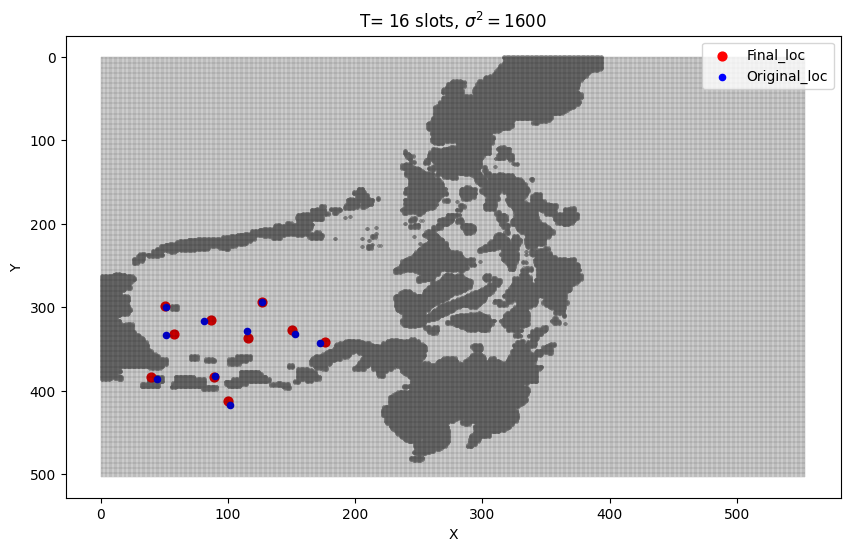

In [686]:
plt.figure(figsize=(10,6))
plt.scatter(x_mask,y_mask,marker='+',s=5,color='grey',alpha=0.5)##plot_mask
plt.scatter(final_loc['X'],final_loc['Y'],marker='o',s=40,color='red',label='Final_loc')
plt.scatter(x_inital,y_inital,marker='o',s=20,color='blue',label='Original_loc')
for i in range(504):
    plt.hlines(y=i,xmin=0,xmax=554,color='black',linewidth=0.1)
for j in range(555):
    plt.vlines(x=j,ymin=0,ymax=503,color='black',linewidth=0.1)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.gca().invert_yaxis()
plt.title('T= 16 slots, $\\sigma^2=1600$ ')
plt.savefig('T_16_1600.png',dpi=400)

## Gaussian model flow

In [469]:
def kernel(loc1,loc2,sigma,l):##RBF squared exponential kernel
    return (sigma**2)*np.exp(-((loc1-loc2)**2)/l/l)

In [470]:
def cov(dim1,dim2,sigma,l):
    cov=np.zeros((dim1.shape[0],dim2.shape[0]))
    for i in range(dim1.shape[0]):
        for j in range(dim2.shape[0]):
            cov[i,j]=kernel(dim1[i],dim2[j],sigma,l)
    return np.matrix(cov)

In [496]:
def gaussian_process(x1_data,x1_mean,x2_mean,x1_cov,x2_cov,x1_x2_cov,tau):
    kn=np.matrix(x1_cov)
    ks=np.matrix(x1_x2_cov)
    x1_data=np.matrix(x1_data).T
    new_mean=x2_mean+ks@np.linalg.solve(kn+tau*np.eye(kn.shape[0]),x1_data-x1_mean)
    new_cov=x2_cov-ks@np.linalg.solve(kn+tau*np.eye(kn.shape[0]),ks.T)
    return np.array(new_mean).flatten(),np.array(new_cov)

In [497]:
from sklearn.model_selection import KFold
from scipy.stats import multivariate_normal
def k_fold_cv(x_train,train_hrs,sigma_range,l_range,K=10,tau=0.001):
    kf=KFold(n_splits=K,shuffle=False)
    likelyhoods=[]
    best_parms=[]
    print(f'tau={tau}')
    for mm,nn in kf.split(train_hrs):
        train_index=np.array(train_hrs[mm])
        test_index=np.array(train_hrs[nn])
        train_data=np.array(x_train.loc[train_index])
        test_data=np.array(x_train.loc[test_index])
        best_llh=-np.inf
        best_p=[[-np.inf,-np.inf]]
        for sigma in sigma_range:
            for l in l_range:
                kn=cov(train_index,train_index,sigma=sigma,l=l)
                KN_test=cov(test_index,test_index,sigma=sigma,l=l)
                ks=cov(test_index,train_index,sigma=sigma,l=l)
                new_mean,new_cov=gaussian_process(train_data,0,0,kn,KN_test,ks,tau=tau)
                new_cov=new_cov+1e-10
                try:
                    l_hood=multivariate_normal.logpdf(test_data,new_mean,new_cov)
                    if l_hood>best_llh:
                        best_llh=l_hood
                        best_p.pop()
                        best_p.append([sigma,l])
                    likelyhoods.append((train_index,test_index,test_data,sigma,l,new_mean,new_cov,l_hood))
                except:
                    l_hood=multivariate_normal.logpdf(test_data,new_mean,new_cov,allow_singular=True)
                    likelyhoods.append((train_index,test_index,test_data,sigma,l,new_mean,new_cov,l_hood))
        print(best_p)
        best_parms.append(best_p)
    return likelyhoods,np.array(best_parms).mean(axis=0)

In [524]:
roi=[(1400//3, 400//3),(1300//3,1200//3),(500//3,600//3),(700//3,800//3)][0]
x_train=us.loc[roi,:].T
y_train=vs.loc[roi,:].T
x_train.index=[3*24*(int(i)+1) for i in x_train.index]
y_train.index=[3*24*(int(i)+1) for i in y_train.index]#假设给的数据是第三天，第6天，一直到第300天(3 days, 6days,..， 300days )

#x_train=y_train

train_hrs=x_train.index ##loc以小时为单位
test_hrs=np.array(list(set(range(0,7200,5))-set(train_hrs)))

In [525]:
tau=0.001

In [519]:
likelyhoods,best_parms=k_fold_cv(x_train,train_hrs,sigma_range=np.arange(1,2000,20)/1000,l_range=np.arange(75,7200,300)/10,K=10,tau=tau)

tau=0.001
[[np.float64(0.221), np.float64(157.5)]]
[[np.float64(0.201), np.float64(187.5)]]
[[np.float64(0.161), np.float64(157.5)]]
[[np.float64(0.241), np.float64(157.5)]]
[[np.float64(0.321), np.float64(187.5)]]
[[np.float64(0.261), np.float64(157.5)]]
[[np.float64(0.101), np.float64(127.5)]]
[[np.float64(0.061), np.float64(127.5)]]
[[np.float64(0.081), np.float64(127.5)]]
[[np.float64(0.101), np.float64(127.5)]]


In [520]:
roi,best_parms

((466, 133), array([[  0.175, 151.5  ]]))

In [521]:
likelyhoods=pd.DataFrame(likelyhoods,index=range(len(likelyhoods)))
likelyhoods.columns=['train_index','test_index','test_data','sigma','l','new_mean','new_cov','l_hood']
likelyhoods['l_hood']=likelyhoods['l_hood'].replace([np.inf,-np.inf],np.nan)
likelyhoods.dropna(subset='l_hood',inplace=True)

In [522]:
sigma,l=best_parms.flatten()
pre_index=np.array(list(set(range(0,7200,10))))#-set(x_train.index
pre_index=np.sort(pre_index)
x1_cov=cov(x_train.index,x_train.index,sigma=sigma,l=l)
x2_cov=cov(pre_index,pre_index,sigma=sigma,l=l)
x1_x2_cov=cov(pre_index,x_train.index,sigma=sigma,l=l)

mean,covs=gaussian_process(x_train,0,0,x1_cov,x2_cov,x1_x2_cov,tau=tau)

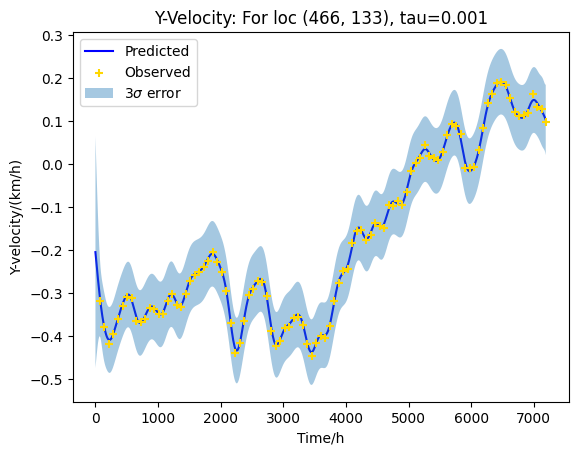

In [523]:
plt.plot(pre_index,mean,markersize=5,color='blue',zorder=0,label='Predicted')
# plt.scatter(pre_index,mean+3*np.sqrt(covs.diagonal()),s=2,color='green')
# plt.scatter(pre_index,mean-3*np.sqrt(covs.diagonal()),s=2,color='green')
plt.scatter(x_train.index,x_train,marker='+',color='gold',zorder=1,label='Observed')
plt.fill_between(pre_index,mean+3*np.sqrt(covs.diagonal()),mean-3*np.sqrt(covs.diagonal()),alpha=0.4,label='$3\\sigma$ error',zorder=0)
plt.legend()
plt.xlabel('Time/h')
plt.ylabel('X-velocity/(km/h)')
plt.title(f'X-Velocity: For loc {roi}, tau={tau}')
plt.savefig('predicted_x_tau_0.001.png',dpi=400)
plt.show()

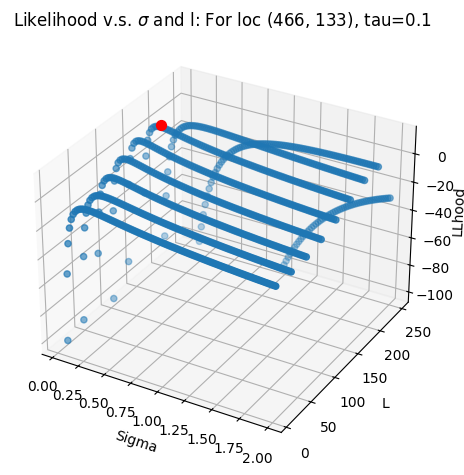

In [509]:
fig = plt.figure()
ax = plt.axes(projection='3d',computed_zorder=False)
plot_data=likelyhoods.groupby(['sigma','l']).mean()['l_hood']
plot_data=plot_data[plot_data>-100]
x=np.array([*plot_data.index])[:,0]
y=np.array([*plot_data.index])[:,1]
z=plot_data.values
ax.scatter3D(x,y,z,zorder=0)
ax.scatter3D(sigma,l,plot_data.max(),color='red',zorder=100,s=50)
ax.set_xlabel('Sigma')
ax.set_ylabel('L')
ax.set_zlabel('LLhood')
ax.zaxis.labelpad=-0.4 # <- change the value here
plt.title(f'Likelihood v.s. $\\sigma$ and l: For loc {roi}, tau={tau}')
plt.tight_layout()
plt.savefig('likelihood_x_tau_0.1.png',dpi=400)
plt.show()

In [528]:
best_parms=np.array([[0.175, 151.5]])

array([[  0.175, 151.5  ]])

In [547]:
from tqdm import tqdm
sigma,l=0.271,145.5
tau=0.001
us_updated=[]
vs_updated=[]
for roi in tqdm(us.index):
    x_train=us.loc[roi,:].T
    y_train=vs.loc[roi,:].T
    x_train.index=[3*24*(int(i)+1) for i in x_train.index]
    y_train.index=[3*24*(int(i)+1) for i in y_train.index]#假设给的数据是第三天，第6天，一直到第300天(3 days, 6days,..， 300days )

    pre_index=np.array(list(set(range(0,7200,10))))#-set(x_train.index
    pre_index=np.sort(pre_index)
    x1_cov=cov(x_train.index,x_train.index,sigma=sigma,l=l)
    x2_cov=cov(pre_index,pre_index,sigma=sigma,l=l)
    x1_x2_cov=cov(pre_index,x_train.index,sigma=sigma,l=l)

    y1_cov=cov(y_train.index,y_train.index,sigma=sigma,l=l)
    y2_cov=cov(pre_index,pre_index,sigma=sigma,l=l)
    y1_y2_cov=cov(pre_index,y_train.index,sigma=sigma,l=l)

    x_mean,covs=gaussian_process(x_train,0,0,x1_cov,x2_cov,x1_x2_cov,tau=tau)
    us_updated.append(list(x_mean))
    y_mean,covs=gaussian_process(y_train,0,0,y1_cov,y2_cov,y1_y2_cov,tau=tau)
    vs_updated.append(list(y_mean))

  0%|          | 231/279720 [11:52<239:18:10,  3.08s/it]


KeyboardInterrupt: 

In [549]:
us_updated

[[np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64